In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('via_interview_question.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Account manager    1000 non-null object
Client Name        1000 non-null object
Date of Contact    1000 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 23.5+ KB


In [4]:
df['date'] = df['Date of Contact'].apply(lambda x: str(x)[:7])

In [5]:
df_groupby = df.groupby('date',as_index=False)['Client Name'].count()

In [6]:
df_groupby.head()

,date,Client Name
0,2013-10,60
1,2013-11,19
2,2013-12,19
3,2014-01,13
4,2014-02,12


In [7]:
df_groupby.rename(columns={'Client Name':'Num_of_Clients'},inplace=True)

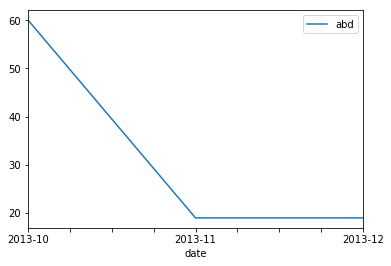

In [8]:
df_groupby[df_groupby.date.str.contains('2013')].plot(x='date',y='Num_of_Clients',label='abd')

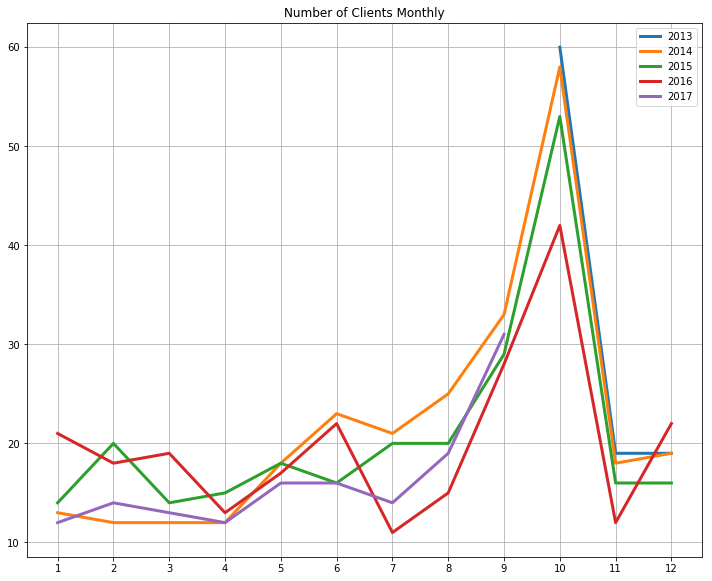

In [9]:
years = ['2013','2014','2015','2016','2017']
plt.figure(figsize=(10,8))

for year in years: 
    x = df_groupby[df_groupby.date.str.contains(year)].date
         
    y = df_groupby[df_groupby.date.str.contains(year)].Num_of_Clients
    ran = x.str[-2:].apply(lambda x: int(x))
    plt.plot(range(min(ran),max(ran)+1),y,label=year,linewidth=3.0)
plt.xticks(range(1,13),[i for i in range(1,13)])
plt.grid()
plt.tight_layout()
plt.legend()
plt.title('Number of Clients Monthly')

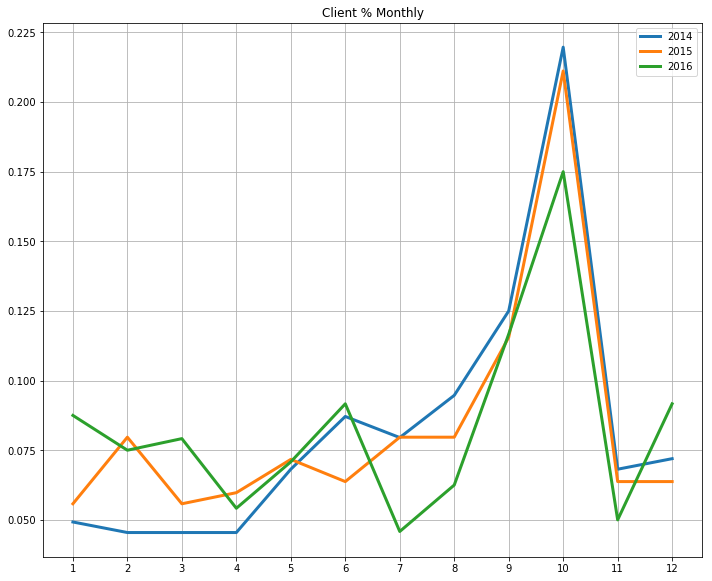

In [10]:
years = ['2014','2015','2016']
plt.figure(figsize=(10,8))

for year in years: 
    x = df_groupby[df_groupby.date.str.contains(year)].date
    year_total_clients = sum(df_groupby[df_groupby.date.str.contains(year)].Num_of_Clients)
    y = df_groupby[df_groupby.date.str.contains(year)].Num_of_Clients
    y_pec = y/year_total_clients
    ran = x.str[-2:].apply(lambda x: int(x))
    plt.plot(range(min(ran),max(ran)+1),y_pec,label=year,linewidth=3.0)
plt.xticks(range(1,13),[i for i in range(1,13)])
plt.grid()
plt.tight_layout()
plt.legend()
plt.title('Client % Monthly')